<a href="https://colab.research.google.com/github/gjduart/NN/blob/main/Exercicio2_MLP_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Alunos : Gabriel Jonas da Silva Duarte, Mayanna Rodrigues Ferreira 



Baixando dataset salvando em uma pasta temporaria 


In [ ]:
!wget --no-check-certificate \
    "https://www.dropbox.com/s/s2cyx82uxsv03rq/dados-ex5.txt?dl=0" \
    -O "/tmp/dados-ex5.txt"



/tmp/ogbn-arxiv/titleabs.tsv.gz: No such file or directory


Importando bibliotecas 
Carragando os dados, convertendo para tensor e separando os X e os Y  

In [ ]:
import numpy as np 
import torch
from torch.nn import Linear
import torch.nn.functional as F

dataset1 = np.genfromtxt('/tmp/dados-ex5.txt', delimiter=',')
dataset1 = torch.from_numpy(dataset1)
x = dataset1[:,:-1]
y = dataset1[:,-1]
y = y.reshape(-1,1)

x = torch.FloatTensor(x.float())
y = y.type(torch.LongTensor)

Separando a quantidade de dados para treino, teste e validação

In [ ]:
n_train = 0.6 * y.shape[0]
n_validation = 0.2 * y.shape[0]
n_test = 0.2 * y.shape[0]

#Split data 
x_train = x[:int(n_train),:]
x_validation = x[int(n_train):int(n_train+n_validation),:]
x_test = x[int(n_train+n_validation):int(n_train+n_validation+n_test),:]

y_train = y[:int(n_train),:]
y_validation = y[int(n_train):int(n_train+n_validation),:]
y_test = y[int(n_train+n_validation):int(n_train+n_validation+n_test),:]
y_train = y_train.reshape(-1)


Definindo o modelo






In [ ]:
class MLP(torch.nn.Module):
    def __init__(self,input_dim, hidden_layers,num_classes):
        super(MLP, self).__init__()
        torch.manual_seed(12345)
        self.lin1 = Linear(input_dim, hidden_layers)
        self.lin2 = Linear(hidden_layers, num_classes)

    def forward(self, x):
        x = self.lin1(x)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin2(x)
        return x


Definindo a funções de treino, validação, teste 





In [ ]:
def train(model,x_train,y_train,criterion,optimizer):
      model.train()
      optimizer.zero_grad()  # Limpa os gradientes do otimizador
      out = model(x_train)  # Realiza um passo do forward
      loss = criterion(out, y_train)  # Computa a loss baseado nos nós de treinamento.
      loss.backward()  # Deriva os gradients.
      optimizer.step()  # atualiza os parametros.
      return loss

@torch.no_grad()      
def validation(model,x_validation,y_validation):
      model.eval()
      out = model(x_validation)
      pred = out.argmax(dim=1)  # Usa a classe com a maior probabilidade.
      test_correct = pred == y_validation  # Checando as classes.
      validation_acc = int(test_correct.sum()) / int(np.ravel(y_validation.numpy().shape,order='C')[0])  # calculando a acuracia
      return validation_acc
 
@torch.no_grad()
def test(model,x_test,y_test):
      model.eval()
      out = model(x_test)
      pred = out.argmax(dim=1)  # Usa a classe com a maior probabilidade.
      test_correct = pred == y_test  # Checando as classes.
      test_acc = int(test_correct.sum()) / int(np.ravel(y_test.numpy().shape,order='C')[0])  # calculando a acuracia
      return test_acc


<h3>Validacao</h3>

In [ ]:
from tqdm import tqdm
input = 2
output = 5
hidden = 128

model = MLP(input, hidden, output)
criterion = torch.nn.CrossEntropyLoss()
#opt = torch.optim.SGD(model.parameters(), lr=0.01, weight_decay=5e-4)
opt = torch.optim.Adam(model.parameters(), lr=0.01,weight_decay=5e-4)
validation_loss = []
#validation_loss2 = []

for epoch in tqdm(range(100)):
  train_loss = train(model,x_train,y_train,criterion, opt)
  validation_loss.append(train_loss)
  train_acc = validation(model,x_train,y_train)
  test_acc =  validation(model,x_validation,y_validation)
  if epoch%10 == 0:
    print(f'Epoca:{epoch}, Loss: {train_loss:.3f}, test_acc:{test_acc:1f}')
validation_loss2.append(validation_loss)




  0%|          | 0/100 [00:00<?, ?it/s]

 32%|███▏      | 32/100 [00:00<00:00, 317.59it/s]

 63%|██████▎   | 63/100 [00:00<00:00, 315.12it/s]

Epoca:0, Loss: 1.415, test_acc:96.300000
Epoca:10, Loss: 0.341, test_acc:90.600000
Epoca:20, Loss: 0.259, test_acc:91.000000
Epoca:30, Loss: 0.207, test_acc:91.000000
Epoca:40, Loss: 0.167, test_acc:91.100000
Epoca:50, Loss: 0.157, test_acc:91.300000
Epoca:60, Loss: 0.127, test_acc:91.100000




100%|██████████| 100/100 [00:00<00:00, 294.62it/s]

Epoca:70, Loss: 0.099, test_acc:91.200000
Epoca:80, Loss: 0.104, test_acc:91.100000
Epoca:90, Loss: 0.079, test_acc:91.000000


Foram testados para as seguintes configurações:</br >
<ol> 
<li>input = 2</br >
output = 2</br >
hidden = 88</li>

<li>input = 2</br >
output = 2</br >
hidden = 32</li>

<li>input = 2</br >
output = 2</br >
hidden = 56</li>

<li>input = 2</br >
output = 2</br >
hidden = 66</li>

<li>input = 2</br >
output = 2</br >
hidden = 128</li>
</ol>

No handles with labels found to put in legend.


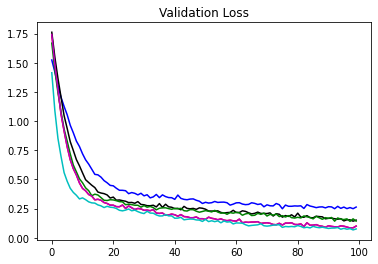

In [ ]:
import matplotlib.pyplot as plt
colors = ['r','b','k','g','m','c']
for i in range(len(validation_loss2)):
  plt.plot(np.array(validation_loss2[i]),colors[i])
plt.title('Validation Loss')
plt.legend(frameon=False)
plt.show()


<h3>Teste</h3>

In [ ]:
input = 2
output = 2
hidden = 128

model = MLP(input, hidden,output)
criterion = torch.nn.CrossEntropyLoss()
#opt = torch.optim.SGD(model.parameters(), lr=0.01, weight_decay=5e-4)
opt = torch.optim.Adam(model.parameters(), lr=0.01)
loss = []
for epoch in tqdm(range(100)):
  train_loss = train(model,x_train,y_train,criterion, opt)
  loss.append(train_loss)
  train_acc = test(model,x_train,y_train)
  test_acc =  test(model,x_test,y_test)
  if epoch%10 == 0:
    print(f'Epoca:{epoch}, Loss: {train_loss:.3f}')



  0%|          | 0/100 [00:00<?, ?it/s]

 32%|███▏      | 32/100 [00:00<00:00, 312.53it/s]

 63%|██████▎   | 63/100 [00:00<00:00, 311.34it/s]

Epoca:0, Loss: 0.704
Epoca:10, Loss: 0.323
Epoca:20, Loss: 0.231
Epoca:30, Loss: 0.204
Epoca:40, Loss: 0.175
Epoca:50, Loss: 0.147
Epoca:60, Loss: 0.116




100%|██████████| 100/100 [00:00<00:00, 290.30it/s]

Epoca:70, Loss: 0.114
Epoca:80, Loss: 0.097
Epoca:90, Loss: 0.094


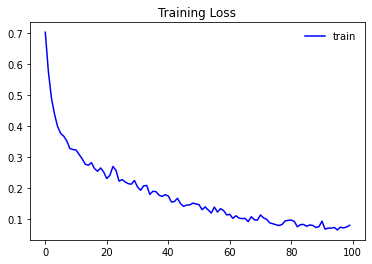

In [ ]:

plt.plot(np.array(loss), label='train',color='b')
#plt.plot(np.array(validation_loss), label='Validation loss',color='r')
plt.title('Training Loss')
plt.legend(frameon=False)
plt.show()


Conclui-se que a melhor configuração é a que tem maior hidden size


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


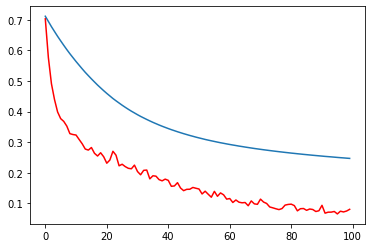

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

clf = MLPClassifier(random_state=100, max_iter=100).fit(x_train, y_train)
clf.predict_proba(x_test[:1])
losses = clf.loss_curve_
plt.plot(losses)
plt.plot(np.array(loss), label='train',color='r')
plt.show()

Comparação de desempenho com um modelo implementado no SKlearn


# 2 Questão


Importando bibliotecas

In [ ]:
import torchvision.transforms as transforms
import torchvision.datasets as dsets

O dataset escolhido foi o Fashion Mnist, o problema consiste em classificação de roupas sendo estas 10 classes diferentes, ele contem 60 mil imagens para treino e 10 mil para teste. As imagens estão em grayscale e 28x28. 

Baixando dataset

In [ ]:
train_dataset = dsets.FashionMNIST(root='./data',
                                   train=True,
                                   transform=transforms.ToTensor(),
                                   download=True)

test_dataset = dsets.FashionMNIST(root='./data',
                                  train=False,
                                  transform=transforms.ToTensor())

Carregando com dataloader

In [ ]:
batch_size = 64 #Quantas amostras eu quero pra aproximar o gradiente

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

Definindo metodos para treino e teste 

In [ ]:
def train(model,x_train,y_train,criterion,optimizer):
      
      optimizer.zero_grad()  # Limpa os gradientes do otimizador
      out = model(x_train)  # Realiza um passo do forward
      loss = criterion(out, y_train)  # Computa a loss baseado nos nós de treinamento.
      loss.backward()  # Deriva os gradients.
      optimizer.step()  # atualiza os parametros.
      return loss

@torch.no_grad()
def test(model,x_test,y_test):
      model.eval()
      out = model(x_test)
      pred = out.argmax(dim=1)  # Usa a classe com a maior probabilidade.
      test_correct = pred == y_test  # Checando as classes.
      test_acc = int(test_correct.sum()) / int(np.ravel(y_test.numpy().shape,order='C')[0])  # calculando a acuracia
      return test_acc


In [ ]:
input_dim = 28*28
output_dim = 10
hidden_dim = 10

model = MLP(input_dim, hidden_dim, output_dim)


criterion = torch.nn.CrossEntropyLoss()
opt = torch.optim.SGD(model.parameters(), lr = 0.01, weight_decay=5e-4)
loss = []
#comparando_loss = []
for epoch in range(100):
  model.train()    

  for i, (images, labels) in enumerate(train_loader):
    images = images.view(-1,28*28)
    labels = labels
    train_loss = train(model,images,labels,criterion, opt)
  loss.append(train_loss)
  
  print(f'Epoca:{epoch}, Loss: {train_loss:.3f}')

comparando_loss.append(loss)      

 



Epoca:0, Loss: 1.460
Epoca:1, Loss: 1.617
Epoca:2, Loss: 1.239
Epoca:3, Loss: 1.460
Epoca:4, Loss: 1.080
Epoca:5, Loss: 1.062
Epoca:6, Loss: 1.017
Epoca:7, Loss: 1.135
Epoca:8, Loss: 1.200
Epoca:9, Loss: 1.169
Epoca:10, Loss: 1.341
Epoca:11, Loss: 1.223
Epoca:12, Loss: 1.078
Epoca:13, Loss: 1.370
Epoca:14, Loss: 1.163
Epoca:15, Loss: 1.179
Epoca:16, Loss: 1.165
Epoca:17, Loss: 1.029
Epoca:18, Loss: 0.990
Epoca:19, Loss: 1.018
Epoca:20, Loss: 0.964
Epoca:21, Loss: 1.072
Epoca:22, Loss: 0.870
Epoca:23, Loss: 1.318
Epoca:24, Loss: 1.111
Epoca:25, Loss: 1.148
Epoca:26, Loss: 1.331
Epoca:27, Loss: 1.189
Epoca:28, Loss: 1.440
Epoca:29, Loss: 0.941
Epoca:30, Loss: 1.233
Epoca:31, Loss: 1.100
Epoca:32, Loss: 1.085
Epoca:33, Loss: 0.997
Epoca:34, Loss: 0.805
Epoca:35, Loss: 1.275
Epoca:36, Loss: 1.166
Epoca:37, Loss: 0.863
Epoca:38, Loss: 1.291
Epoca:39, Loss: 1.048
Epoca:40, Loss: 0.919
Epoca:41, Loss: 0.908
Epoca:42, Loss: 1.022
Epoca:43, Loss: 1.016
Epoca:44, Loss: 1.436
Epoca:45, Loss: 1.13

Foram testados para as seguintes configurações:</br >
<ol> 
<li>input_dim = 28*28</br >
output_dim = 10</br >
hidden_dim = 100</li>

<li>input_dim = 28*28</br >
output_dim = 10</br >
hidden_dim = 32</li>

<li>input_dim = 28*28</br >
output_dim = 10</br >
hidden_dim = 10</li>
</ol>

No handles with labels found to put in legend.


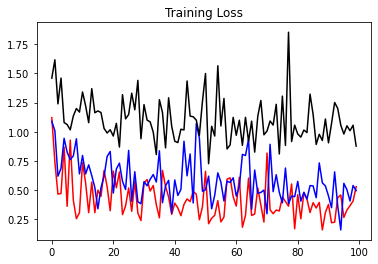

In [ ]:
import matplotlib.pyplot as plt
colors = ['r','b','k','g','m','c']
for i in range(len(comparando_loss)):
  plt.plot(np.array(comparando_loss[i]), colors[i])
#plt.plot(np.array(validation_loss), label='Validation loss',color='r')
plt.title('Training Loss')
plt.legend(frameon=False)
plt.show()
